Function is 3*x**2 + 2*x + 1, initial guess = 5 and stepsize = 0.1 and tolerance = 0.001
Minima of func by Gradient Descent method is -0.332774092800000
Take 9 steps
Minima of func by Newton-raphson method is -0.333333333333333
after 1  steps


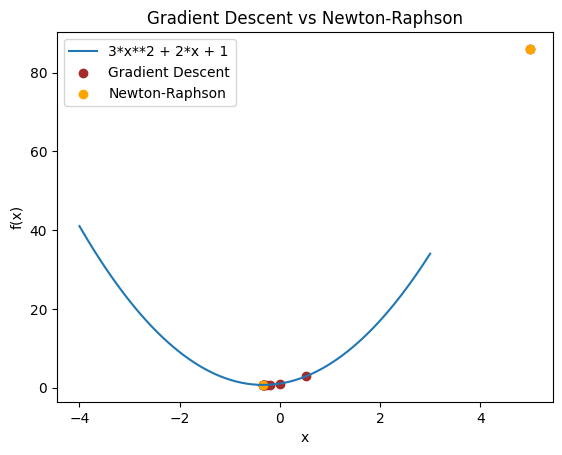

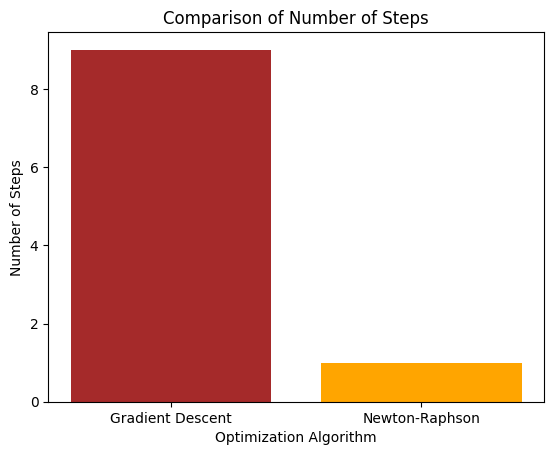

In [13]:
#import the required modules
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

# take the function
x=symbols('x')
fn=3*(x**2) + 2*x + 1

#inputs for the function
initial_guess=5
stepsize=0.1      
# stepsize is used in gradient descent not in newton raphson
tolerance=0.001
print(f"Function is {fn}, initial guess = {initial_guess} and stepsize = {stepsize} and tolerance = {tolerance}")

# value of function at different x
def fn_value(n):
    return fn.evalf(subs={x:n})  
# evalf evaluate the value of function substituting x with the argument n


#taking x and y values for graph ploting. It can be different for different graphs
x_values=np.linspace(-4, 3, 200)
y_values=[fn_value(x) for x in x_values]


# Method 1: Gradient Descent method
x_initial=initial_guess
fn_diff=diff(fn, x)
reslt_gred_desc=[x_initial]     # new generated x will be stored in this list
slope=fn_diff.evalf(subs={x:x_initial})
x_final=x_initial-(slope*stepsize)          # to find next x in gradient descent method.
steps_grad_des=0
while abs(x_final-x_initial)>tolerance:
    steps_grad_des+=1
    x_initial=x_final
    slope=fn_diff.evalf(subs={x:x_initial})
    x_final=x_initial-(slope*stepsize)
    reslt_gred_desc.append(x_final)
print("Minima of func by Gradient Descent method is",x_final)    
print("Take",steps_grad_des,"steps")

# Method 2: Newton-Raphson method
x_initial=initial_guess
gn=diff(fn,x)    # derivative of the given function
reslt_newton=[x_initial]    # new generated x will be stored in this list
slop=diff(gn,x).evalf(subs={x:x_initial})
x_final=x_initial-(gn.evalf(subs={x:x_initial}))/slop     # to find next x in newton-raphson method.
step_newton=0
while abs(x_initial-x_final)>tolerance:
    step_newton+=1
    x_initial=x_final
    slop=diff(gn,x).evalf(subs={x:x_initial})
    x_fin=x_initial-(gn.evalf(subs={x:x_initial}))/slop
    reslt_newton.append(x_final)
print("Minima of func by Newton-raphson method is",x_final)    
print("after",step_newton," steps")


# graph ploating
plt.plot(x_values, y_values, label=fn)
plt.scatter(reslt_gred_desc, [fn_value(x) for x in reslt_gred_desc], c='brown', label='Gradient Descent')
plt.scatter(reslt_newton, [fn_value(x) for x in reslt_newton], c='orange', label='Newton-Raphson')
plt.title('Gradient Descent vs Newton-Raphson')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Bar graph which compare the number of steps
algorithms = ['Gradient Descent', 'Newton-Raphson']
steps = [steps_grad_des, step_newton]
plt.bar(algorithms, steps, color=['brown', 'orange'])
plt.title('Comparison of Number of Steps')
plt.xlabel('Optimization Algorithm')
plt.ylabel('Number of Steps')
plt.show()